In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np 

btc_data = pd.read_csv('../filtered_data/eth_hr_filtered.csv')
btc_data

,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2023-05-12 19:00:43,1422.537632,1.710103e+11,7.404078e+09,0.00,0.00,stay the same
1,2,2023-05-12 20:00:01,1422.698065,1.727088e+11,7.128531e+09,0.01,0.00,increase
2,3,2023-05-12 21:00:37,1436.936059,1.727841e+11,8.134852e+09,1.00,0.00,increase
3,4,2023-05-12 22:00:41,1449.553316,1.745663e+11,8.240521e+09,0.88,0.00,increase
4,5,2023-05-12 23:00:52,1449.475989,1.742240e+11,8.256760e+09,-0.01,0.00,decrease
...,...,...,...,...,...,...,...,...
2158,2159,2023-08-10 15:00:22,1453.695490,1.742574e+11,3.788152e+09,-0.25,0.24,decrease
2159,2160,2023-08-10 16:01:01,1456.247509,1.748472e+11,4.014723e+09,0.18,0.37,increase
2160,2161,2023-08-10 17:01:27,1455.013815,1.749402e+11,3.599925e+09,-0.08,0.37,decrease
2161,2162,2023-08-10 18:00:43,1455.852401,1.749664e+11,3.761659e+09,0.06,0.37,increase


In [81]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a target label column named 'target' in your DataFrame
label_encoder = LabelEncoder()
btc_data['Class'] = label_encoder.fit_transform(btc_data['Class'])

# Get the mapping between the encoded labels and the original classes
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for encoded_label, original_class in label_mapping.items():
    print(f"Encoded Label: {encoded_label} --> Original Class: {original_class}")
    
btc_data

Encoded Label: 0 --> Original Class: decrease
Encoded Label: 1 --> Original Class: increase
Encoded Label: 2 --> Original Class: stay the same


,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2023-05-12 19:00:43,1422.537632,1.710103e+11,7.404078e+09,0.00,0.00,2
1,2,2023-05-12 20:00:01,1422.698065,1.727088e+11,7.128531e+09,0.01,0.00,1
2,3,2023-05-12 21:00:37,1436.936059,1.727841e+11,8.134852e+09,1.00,0.00,1
3,4,2023-05-12 22:00:41,1449.553316,1.745663e+11,8.240521e+09,0.88,0.00,1
4,5,2023-05-12 23:00:52,1449.475989,1.742240e+11,8.256760e+09,-0.01,0.00,0
...,...,...,...,...,...,...,...,...
2158,2159,2023-08-10 15:00:22,1453.695490,1.742574e+11,3.788152e+09,-0.25,0.24,0
2159,2160,2023-08-10 16:01:01,1456.247509,1.748472e+11,4.014723e+09,0.18,0.37,1
2160,2161,2023-08-10 17:01:27,1455.013815,1.749402e+11,3.599925e+09,-0.08,0.37,0
2161,2162,2023-08-10 18:00:43,1455.852401,1.749664e+11,3.761659e+09,0.06,0.37,1


In [82]:
selected_columns= btc_data.iloc[:, [2, 3, 4, 5, 6, 7]]

# Split the data into features (X) and target label (y)
X= selected_columns.iloc[:, :-1]  # Features (columns 2, 3, 4)
y= selected_columns.iloc[:, -1]   # Target label (column 7)# Standardize the data

In [83]:
selected_columns

,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1422.537632,1.710103e+11,7.404078e+09,0.00,0.00,2
1,1422.698065,1.727088e+11,7.128531e+09,0.01,0.00,1
2,1436.936059,1.727841e+11,8.134852e+09,1.00,0.00,1
3,1449.553316,1.745663e+11,8.240521e+09,0.88,0.00,1
4,1449.475989,1.742240e+11,8.256760e+09,-0.01,0.00,0
...,...,...,...,...,...,...
2158,1453.695490,1.742574e+11,3.788152e+09,-0.25,0.24,0
2159,1456.247509,1.748472e+11,4.014723e+09,0.18,0.37,1
2160,1455.013815,1.749402e+11,3.599925e+09,-0.08,0.37,0
2161,1455.852401,1.749664e+11,3.761659e+09,0.06,0.37,1


In [84]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [85]:
#SVM MODEL
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [86]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Create an SVM classifier (ONE VS ONE with RBF kernel)
svm_classifier = SVC(decision_function_shape='ovo')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

Accuracy: 0.9599
Precision: 0.9587
Recall: 0.9599
F1-score: 0.9592


/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


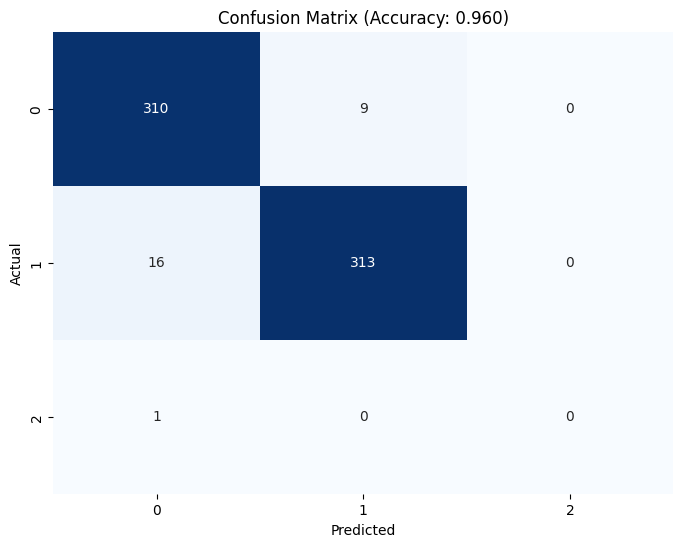

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()